# CDC Diabetes Health Indicators – Balanced Dataset Analysis (5050)

## Project Overview -  🩺 Predicting Diabetes Using Health and Lifestyle Factors

This project analyzes the 2015 Behavioral Risk Factor Surveillance System (BRFSS) data focused on health indicators related to diabetes. The dataset used is a **balanced subset** containing an equal number of diabetic and non-diabetic individuals. The goal is to explore the patterns, risk factors, and potential predictive signals related to diabetes for healthcare insights and future model development.

### 🎯 Objectives:
- Understand which factors (e.g., BMI, smoking, physical activity) correlate with diabetes
- Visualize health patterns among diabetic vs non-diabetic individuals
- Build and evaluate a model to predict diabetes risk

## Dataset Details

- **Source**: UCI Machine Learning Repository – CDC Diabetes Health Indicators (BRFSS 2015)
- **File used**: `diabetes_binary_5050.csv`
- **Samples**: 253,680 individuals (after duplicate removal)
- **Features**: 21 variables including:
  - **Demographics**: Age, Sex, Income, Education
  - **Health behaviors**: Smoking, Alcohol use, Physical Activity, Sleep
  - **Medical history**: High Blood Pressure, High Cholesterol, General Health
- **Target Variable**: `Diabetes_binary` (0 = No diabetes, 1 = Diabetes)

## Dataset Overview

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [93]:
df = pd.read_csv("C:/Users/wpmpo/OneDrive/Documents/Roche Diagnostics Interview/CDC_Diabetes_Project/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [94]:
df.shape,df.columns

((70692, 22),
 Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'],
       dtype='object'))

In [95]:
df.info

<bound method DataFrame.info of        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  

### Understanding and Visualizing the calss distribution of the data set

In [96]:
df['Diabetes_binary'].value_counts(normalize=True)*100

Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

### Visualizing the distibution of the dataset

C:\Users\wpmpo\AppData\Local\Temp\ipykernel_19648\2513786004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=df, palette='Set2')


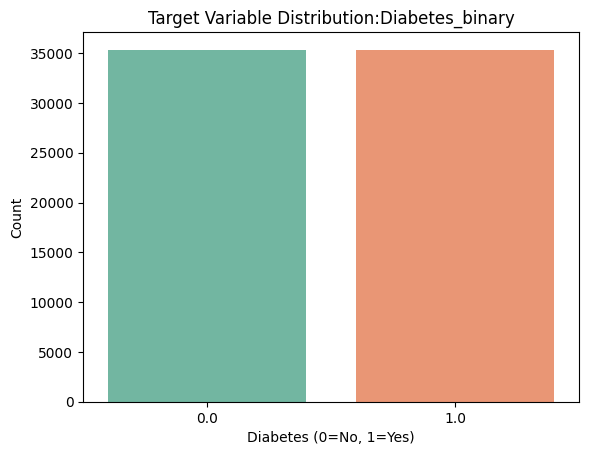

In [97]:
sns.countplot(x='Diabetes_binary', data=df, palette='Set2')
plt.title('Target Variable Distribution:Diabetes_binary')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

#### Checking for missing values

In [8]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1635)

In [10]:
df= df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Steps Taken:
- Checked for and removed **duplicate rows** (1,635 duplicates dropped)
- Verified that there were **no missing or null values**
- Retained all columns for analysis

## Exploratory Data Analysis

### Univariate Analysis (Feature Distributions)

This section explores the distribution of individual features to understand their behavior.

- **Numeric Features**: BMI, Age, Sleep
- **Categorical/Binary Features**: HighBP, Smoking, PhysicalActivity, Sex

### Univariate Analysis – BMI

**Feature**: BMI (Body Mass Index)  
**Type**: Continuous Numeric

BMI is a key indicator of body fat based on height and weight. It is commonly used to assess obesity, which is a known risk factor for diabetes.

#### 📈 Summary Statistics:
We use `describe()` to view key statistics like mean, median, and standard deviation. This helps us understand the central tendency and spread of BMI values in the population.


In [13]:
df['BMI'].describe()

count    69057.000000
mean        29.955834
std          7.147972
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

The following statistics describe the distribution of BMI values in the dataset:

- **Mean**: 29.96 — this falls in the **overweight** category (25–29.9), very close to the **obese** threshold (≥30).
- **Standard Deviation**: 7.15 — indicates moderate variability in BMI across individuals.
- **Minimum BMI**: 12.0 — unusually low, possibly due to underweight individuals or data entry errors.
- **Maximum BMI**: 98.0 — very high, indicating potential outliers or extreme obesity.
- **Median (50%)**: 29.0 — also in the overweight range, confirming a skew toward higher BMI values.
- **Interquartile Range (IQR)**: 25.0 to 33.0 — the middle 50% of individuals fall within this BMI range, which spans overweight to obese categories.

Overall, the distribution of BMI is centered around the obesity threshold, suggesting that weight-related risk is a significant factor in this population.


Some BMI values in the dataset (e.g., 95, 98) fall outside biologically plausible ranges. Since BMI values above 60 or below 10 are extremely rare in real-world populations and may reflect data entry errors or anomalies, a filter was applied to restrict the analysis to BMI values between **10 and 60**. This helps ensure more realistic and interpretable results.
    

#### 📊 Histogram – BMI Distribution

The histogram below visualizes the distribution of BMI values in the dataset. A kernel density estimate (KDE) line is overlaid to show the smoothed shape of the distribution.


<function matplotlib.pyplot.show(close=None, block=None)>

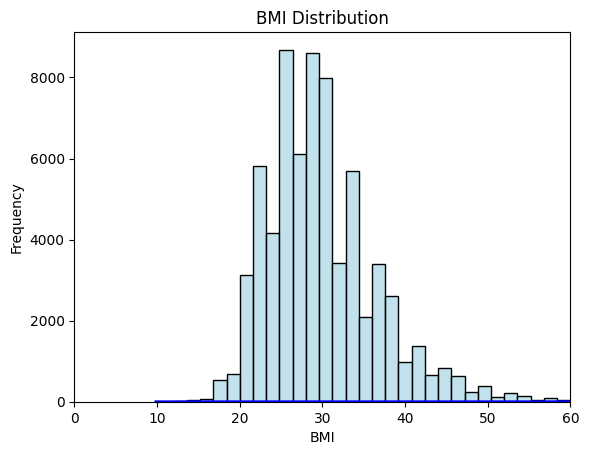

In [14]:
df = df[(df['BMI'] >= 10) & (df['BMI'] <= 60)]

sns.histplot(df['BMI'],bins=30, color='lightblue')

sns.kdeplot(df['BMI'], color='blue', linewidth = 2)

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xlim(0, 60)
plt.show

### 📊 Univariate Analysis – HighBP

**Feature**: HighBP (High Blood Pressure)  
**Type**: Binary (0 = No, 1 = Yes)

High blood pressure is a key health risk factor that often co-occurs with type 2 diabetes. This feature indicates whether a respondent has been diagnosed with hypertension.

#### 📈 Value Distribution:
We examine how many individuals report high blood pressure and what proportion of the total they represent.

- **0 = No High Blood Pressure**
- **1 = Has High Blood Pressure**

In [15]:
df['HighBP'].value_counts()


HighBP
1.0    39275
0.0    29522
Name: count, dtype: int64

In [16]:
df['HighBP'].value_counts(normalize=True) * 100


HighBP
1.0    57.088245
0.0    42.911755
Name: proportion, dtype: float64

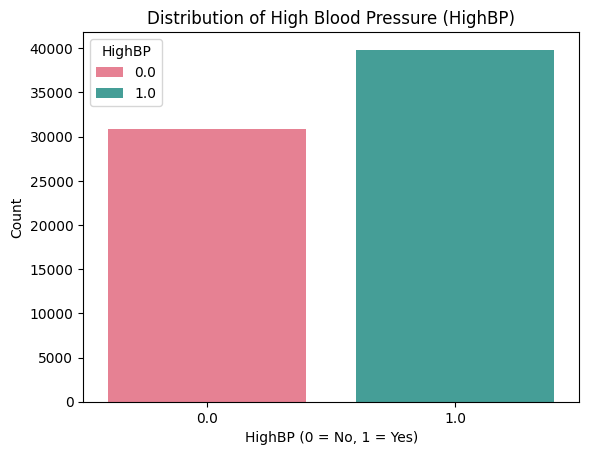

In [100]:
sns.countplot(hue='HighBP', x='HighBP', data=df, palette='husl')
plt.title('Distribution of High Blood Pressure (HighBP)')
plt.xlabel('HighBP (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


#### 📈 Value Distribution:
- **57.09%** of individuals in the dataset reported having high blood pressure.
- **42.91%** reported not having high blood pressure.

The distribution is slightly skewed, with more than half of the population affected by high blood pressure. This supports its role as a relevant risk factor for further analysis in relation to diabetes status.

### 🚬 Univariate Analysis – Smoking

**Feature**: Smoking  
**Type**: Binary (0 = No, 1 = Yes)

This variable indicates whether an individual has smoked at least 100 cigarettes in their lifetime — a CDC threshold used to classify habitual smoking.


In [18]:
df['Smoker'].value_counts()
df['Smoker'].value_counts(normalize=True) * 100


Smoker
0.0    51.791503
1.0    48.208497
Name: proportion, dtype: float64

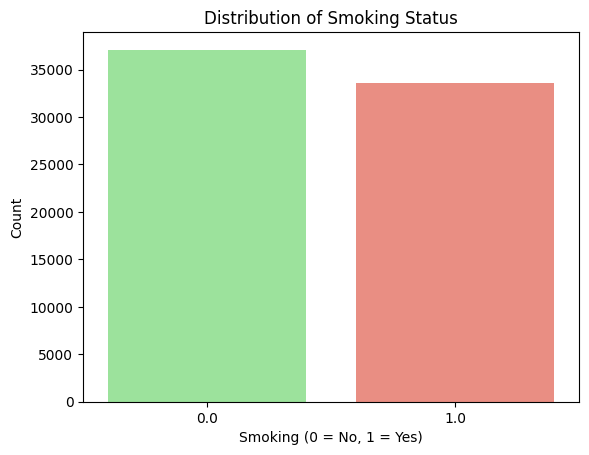

In [102]:
sns.countplot(x='Smoker', hue='Smoker', data=df, palette=['lightgreen', 'salmon'])
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Optional: hides duplicate legend
plt.show()

#### 📈 Value Distribution:

- Approximately **51.8%** of individuals in the dataset are classified as smokers.
- About **48.2%** are non-smokers.

The dataset shows a nearly balanced split between smokers and non-smokers. Given smoking's strong association with cardiovascular and metabolic diseases, this feature may play an important role in identifying behavioral risk factors for diabetes in the modeling phase.

### 🎂 Univariate Analysis – Age

**Feature**: Age  
**Type**: Ordinal Numeric (1–13, representing age groups)

This feature reflects respondent age in 5-year grouped intervals. It ranges from **1 = 18–24 years** to **13 = 80+ years**.

In [20]:
df['Age'].value_counts().sort_index()

Age
1.0       970
2.0      1368
3.0      1982
4.0      2677
5.0      3364
6.0      4445
7.0      6588
8.0      8349
9.0      9839
10.0    10550
11.0     7922
12.0     5352
13.0     5391
Name: count, dtype: int64

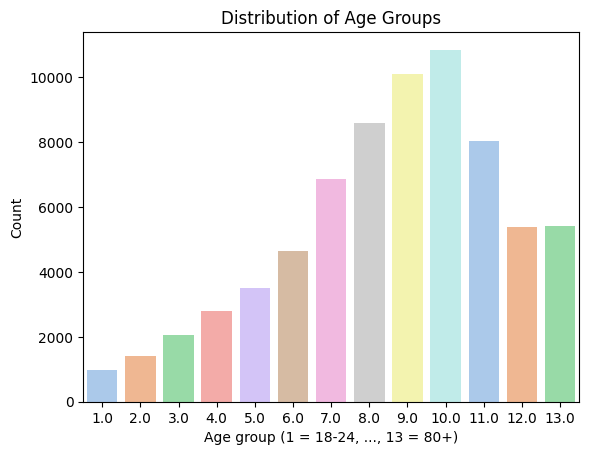

In [103]:
sns.countplot(x='Age', hue='Age', data=df, palette='pastel')
plt.title('Distribution of Age Groups')
plt.xlabel('Age group (1 = 18-24, ..., 13 = 80+)')
plt.ylabel('Count')
plt.legend([], [], frameon=False)  # hides the redundant legend
plt.show()


#### 📋 Age Group Mapping

The table below explains the coding used in the `Age` column. Each number corresponds to a 5-year age bracket used in the BRFSS survey.

| Age Code | Age Range     |
|----------|---------------|
| 1        | 18–24 years   |
| 2        | 25–29 years   |
| 3        | 30–34 years   |
| 4        | 35–39 years   |
| 5        | 40–44 years   |
| 6        | 45–49 years   |
| 7        | 50–54 years   |
| 8        | 55–59 years   |
| 9        | 60–64 years   |
| 10       | 65–69 years   |
| 11       | 70–74 years   |
| 12       | 75–79 years   |
| 13       | 80+ years     |


### 🏥 Univariate Analysis – PhysHlth

**Feature**: PhysHlth (Number of Unhealthy Physical Health Days in Past 30 Days)  
**Type**: Discrete Integer (0–30)

This variable captures self-reported physical illness or injury in the past 30 days. It reflects overall physical wellness and may serve as a proxy for chronic conditions or frequent health issues.

In [22]:
df['PhysHlth'].describe()


count    68797.000000
mean         5.921973
std         10.119970
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: PhysHlth, dtype: float64

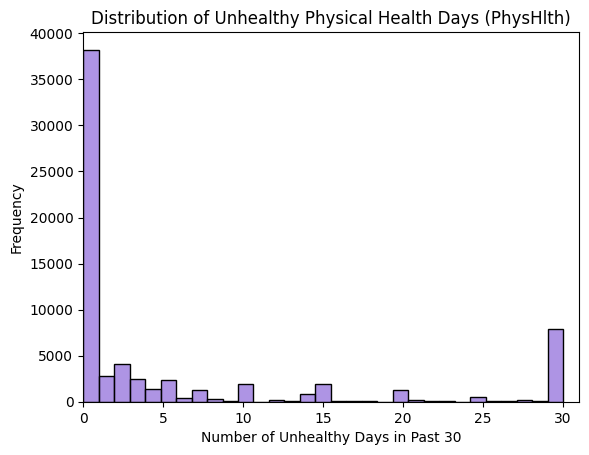

In [23]:
sns.histplot(df['PhysHlth'], bins=31, kde=False, color='mediumpurple')
plt.title('Distribution of Unhealthy Physical Health Days (PhysHlth)')
plt.xlabel('Number of Unhealthy Days in Past 30')
plt.ylabel('Frequency')
plt.xlim(0, 31)
plt.show()


#### 📈 Distribution Summary:

The histogram shows a right-skewed distribution, with many individuals reporting 0–5 unhealthy days and a smaller group reporting 20–30 days. Higher values may be linked to long-term health problems, which can be relevant when studying diabetes risk.

### 🔍 Bivariate Analysis: Feature Relationships with Diabetes

This section explores how individual features differ between those with and without diabetes. By comparing distributions and proportions across the two classes (`Diabetes_binary`: 0 = No, 1 = Yes), we aim to identify patterns that may serve as predictive signals.

Both numeric and categorical variables are analyzed using visual and statistical methods such as boxplots, barplots, and grouped means.


### ⚖️ BMI vs Diabetes_binary

This plot compares the distribution of BMI between individuals with and without diabetes.

- **0 = No Diabetes**
- **1 = Diagnosed with Diabetes**




In [24]:
df.groupby('Diabetes_binary')['BMI'].mean()


Diabetes_binary
0.0    27.750613
1.0    31.769599
Name: BMI, dtype: float64

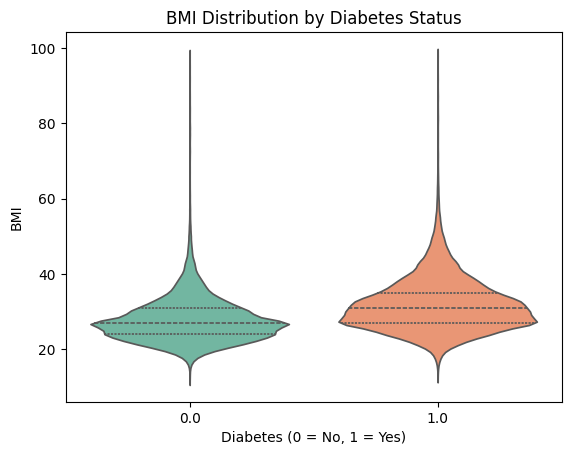

In [104]:
sns.violinplot(x='Diabetes_binary', y='BMI', hue='Diabetes_binary',
               data=df, palette='Set2', inner='quartile')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.legend([], [], frameon=False)  # Optional: hide redundant legend
plt.show()



#### 🎻 Violin Plot:
The violin plot provides a smooth distribution curve for each group. It shows:
- Diabetics tend to cluster more heavily around BMI values between **30–35**, aligning with the **obesity threshold**.
- Non-diabetics show a slightly lower concentration around **25–30**, in the **overweight range**.

### 🧓 Bivariate Analysis – Age vs Diabetes_binary

The `Age` feature is ordinal, representing 13 grouped intervals from **18–24 years (1)** to **80+ years (13)**.

In [35]:
df.groupby('Diabetes_binary')['Age'].mean()


Diabetes_binary
0.0    7.810044
1.0    9.383382
Name: Age, dtype: float64

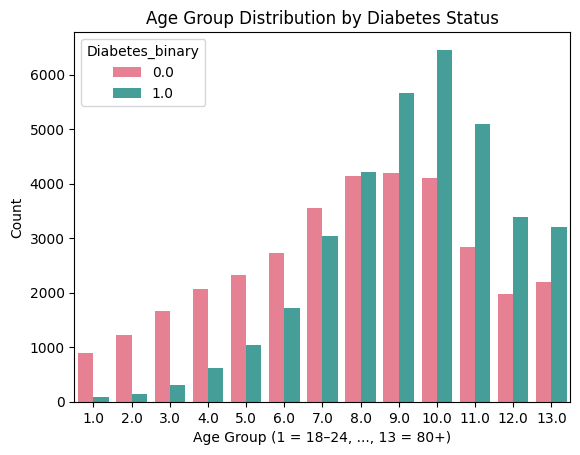

In [42]:
sns.countplot(x='Age', hue='Diabetes_binary', data=df, palette='husl')
plt.title('Age Group Distribution by Diabetes Status')
plt.xlabel('Age Group (1 = 18–24, ..., 13 = 80+)')
plt.ylabel('Count')
plt.show()


The grouped bar chart shows a **clear upward trend** — as age increases, the proportion of individuals with diabetes increases significantly.

- Lower age groups (1–5) are mostly non-diabetic
- Higher age groups (10–13) have a visibly larger diabetic population

This confirms that **diabetes prevalence increases with age**, as expected in both clinical and epidemiological literature.

### 🏥 Bivariate Analysis – PhysHlth vs Diabetes_binary

`PhysHlth` measures how many days in the past 30 were physically unhealthy (due to illness or injury). This feature reflects a respondent’s general physical condition.


In [43]:
df.groupby('Diabetes_binary')['PhysHlth'].mean()


Diabetes_binary
0.0    3.807003
1.0    7.973057
Name: PhysHlth, dtype: float64

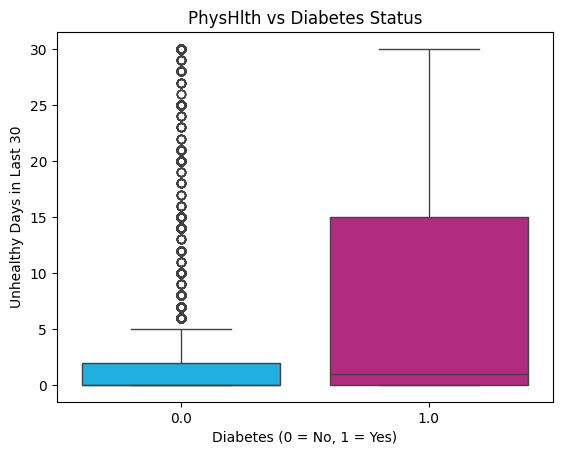

In [105]:
sns.boxplot(x='Diabetes_binary', y='PhysHlth', hue='Diabetes_binary',
            data=df, palette={0: 'deepskyblue', 1: 'mediumvioletred'})

plt.title('PhysHlth vs Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Unhealthy Days in Last 30')
plt.legend([], [], frameon=False)  # Optional: hide duplicate legend
plt.show()



The boxplot shows that:
- Individuals with diabetes report a **higher number of unhealthy days**
- Median and interquartile range for diabetics is noticeably higher
- The non-diabetic group skews toward **fewer than 5 unhealthy days**

This suggests that diabetes is often accompanied by **worse physical health overall**, further supporting the clinical burden of the disease.

### 🩺 High Blood Pressure vs Diabetes



In [58]:
df.groupby('HighBP')['Diabetes_binary'].mean()


HighBP
0.0    0.293341
1.0    0.668771
Name: Diabetes_binary, dtype: float64

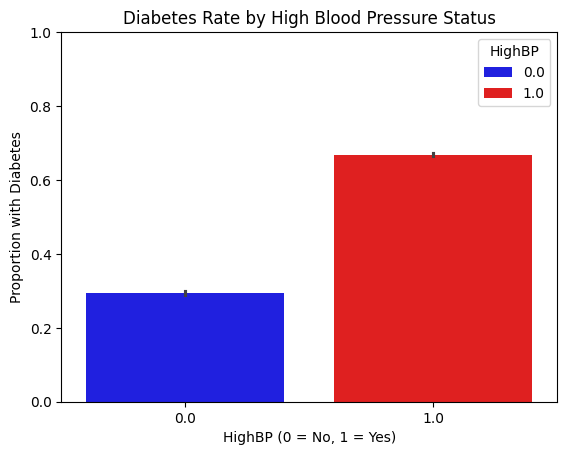

In [67]:
sns.barplot(
    x='HighBP', 
    y='Diabetes_binary', 
    hue='HighBP', 
    data=df, 
    palette={0: 'blue', 1: 'red'},
    dodge=False 
)
plt.title('Diabetes Rate by High Blood Pressure Status')
plt.xlabel('HighBP (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.legend(title='HighBP')
plt.show()



The bar plot shows that individuals with high blood pressure (HighBP = 1) have a significantly **higher proportion of diabetes** compared to those without it.

This aligns with established medical knowledge, as hypertension and diabetes often co-occur due to shared lifestyle and metabolic risk factors. HighBP is therefore a strong predictor and potential early warning signal.


### 🧬 High Cholesterol vs Diabetes

In [63]:
df.groupby('HighChol')['Diabetes_binary'].mean()


HighChol
0.0    0.357661
1.0    0.639960
Name: Diabetes_binary, dtype: float64

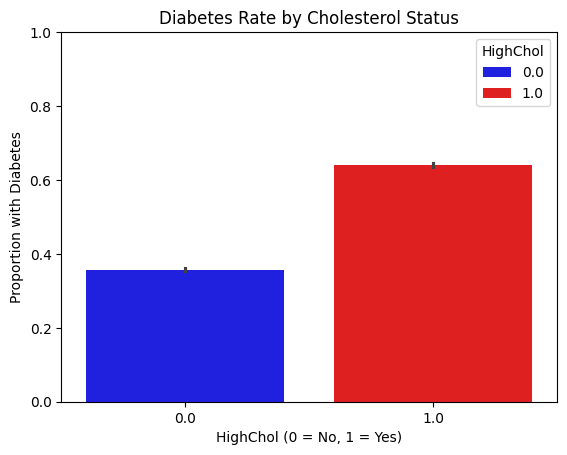

In [66]:
sns.barplot(
    x='HighChol', 
    y='Diabetes_binary', 
    hue='HighChol',  
    data=df, 
    palette={0: 'blue', 1: 'red'},
    dodge=False  
)
plt.title('Diabetes Rate by Cholesterol Status')
plt.xlabel('HighChol (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.show()


This plot illustrates that individuals with high cholesterol (HighChol = 1) show a **higher diabetes rate** than those without.

While not as strong as HighBP, this relationship is expected — elevated cholesterol levels are part of the metabolic syndrome that increases diabetes risk.


### 🚬 Smoking vs Diabetes

In [68]:
df.groupby('HighChol')['Diabetes_binary'].mean()


HighChol
0.0    0.357661
1.0    0.639960
Name: Diabetes_binary, dtype: float64

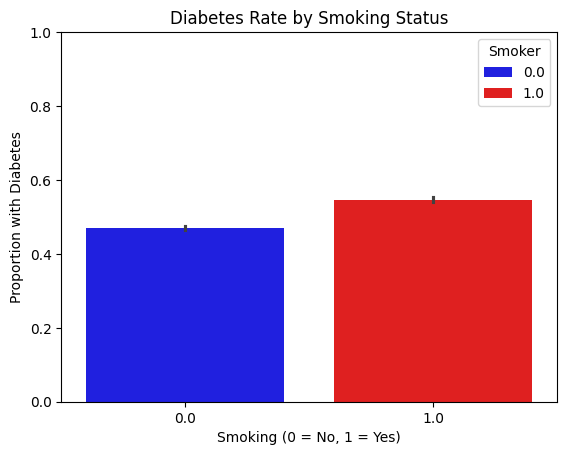

In [69]:
sns.barplot(
    x='Smoker', 
    y='Diabetes_binary', 
    hue='Smoker',  
    data=df, 
    palette={0: 'blue', 1: 'red'},
    dodge=False  
)
plt.title('Diabetes Rate by Smoking Status')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.show()



The chart reveals that smokers (Smoking = 1) have a **slightly higher average diabetes prevalence** than non-smokers.

Although the difference is smaller compared to blood pressure or cholesterol, this still supports the inclusion of smoking as a behavioral risk factor in diabetes screening and prediction models.

### 💪 Physical Activity vs Diabetes


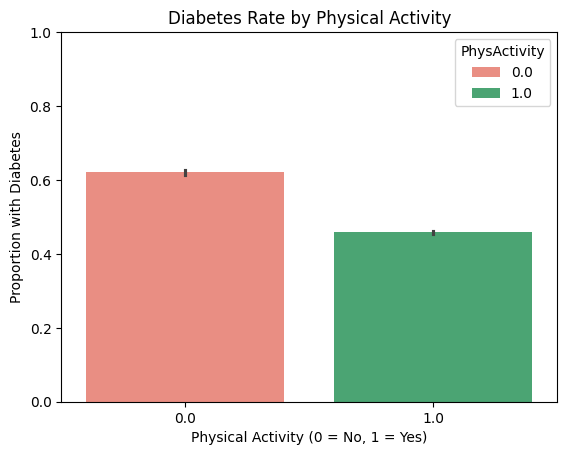

In [80]:
sns.barplot(
    x='PhysActivity',
    y='Diabetes_binary',
    hue='PhysActivity',  # Same as x-axis to enable color mapping
    data=df,
    palette={0: 'salmon', 1: 'mediumseagreen'},
    dodge=False  # Keeps bars side-by-side without separating
)
plt.title('Diabetes Rate by Physical Activity')
plt.xlabel('Physical Activity (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.legend(title='PhysActivity')
plt.show()


### 🧠 General Health vs Diabetes

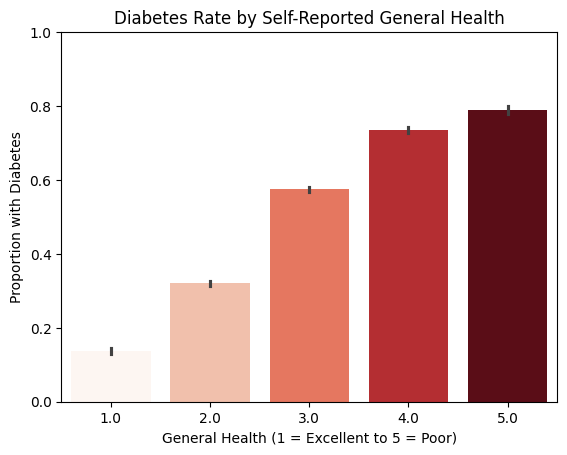

In [106]:
sns.barplot(
    x='GenHlth', y='Diabetes_binary',
    hue='GenHlth', data=df, palette='Reds'
)
plt.title('Diabetes Rate by Self-Reported General Health')
plt.xlabel('General Health (1 = Excellent to 5 = Poor)')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.legend([], [], frameon=False)  # Optional: hides legend if not needed
plt.show()


### 🥗 Diet & Lifestyle Factors vs Diabetes


In [81]:
melted_df = pd.melt(
    df,
    id_vars='Diabetes_binary',
    value_vars=['Fruits', 'Veggies'],
    var_name='Behavior',
    value_name='Value'
)


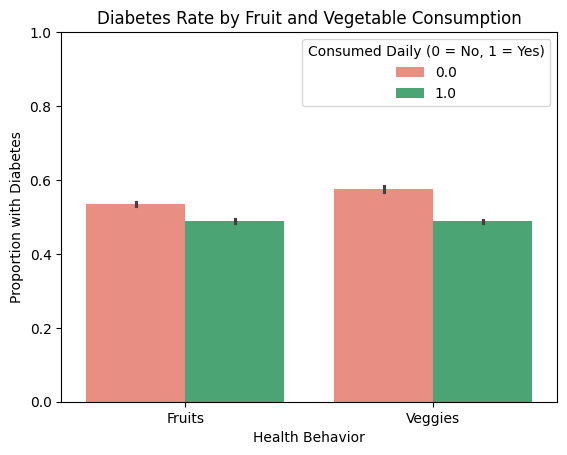

In [82]:
sns.barplot(
    x='Behavior',
    y='Diabetes_binary',
    hue='Value',
    data=melted_df,
    palette={0: 'salmon', 1: 'mediumseagreen'}
)
plt.title('Diabetes Rate by Fruit and Vegetable Consumption')
plt.xlabel('Health Behavior')
plt.ylabel('Proportion with Diabetes')
plt.ylim(0, 1)
plt.legend(title='Consumed Daily (0 = No, 1 = Yes)')
plt.show()


### 🥗 Combined View: Fruits and Vegetables vs Diabetes

This grouped bar chart compares the average diabetes rate among individuals who **do or do not** consume fruits and vegetables daily.

- For both `Fruits` and `Veggies`, those who **consume them daily** have a **lower rate of diabetes**.
- The pattern is consistent and aligns with nutritional science, highlighting the role of healthy eating in reducing metabolic disease risk.
- Although the effect size may be modest, these variables can still contribute meaningfully to behavioral risk assessment models.

These findings reinforce the importance of including dietary behavior in diabetes prevention strategies.


## 🧪 Predictive Modeling: Logistic Regression

### 🎯 Objective
The goal is to build a model that predicts whether an individual has diabetes (`Diabetes_binary`: 0 = No, 1 = Yes) based on their health and lifestyle characteristics.

### ✅ Selected Features
Based on domain relevance and EDA insights, the following variables were selected as predictors:

- **BMI**: Body Mass Index
- **Age**: Age group (1 = 18–24, ..., 13 = 80+)
- **HighBP**: Diagnosed with high blood pressure
- **HighChol**: Diagnosed with high cholesterol
- **Smoker**: Smoked 100+ cigarettes in lifetime
- **PhysActivity**: Any physical activity in the past 30 days
- **GenHlth**: Self-reported general health (1 = Excellent to 5 = Poor)
- **Fruits**: Consumed fruits daily
- **Veggies**: Consumed vegetables daily
- **PhysHlth**: Number of unhealthy physical health days in past 30

These features capture a combination of **biometric**, **behavioral**, and **self-reported health** indicators.

### 🧹 Data Preparation
- All selected features are numeric or binary, allowing direct use in logistic regression.
- No missing values or duplicates are present in the dataset.
- The `Smoking` column was renamed to `Smoker` for consistency.

### 🔄 Train-Test Split
To evaluate model performance fairly, the dataset will be split into training and test sets using an **80/20 split**. The training set will be used to fit the model, and the test set will be used to evaluate predictive accuracy.


In [83]:
from sklearn.model_selection import train_test_split

# Define predictors (X) and target (y)
X = df[[
    'BMI', 'Age', 'HighBP', 'HighChol', 'Smoker',
    'PhysActivity', 'GenHlth', 'Fruits', 'Veggies', 'PhysHlth'
]]
y = df['Diabetes_binary']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 🔀 Train-Test Split

To prepare for modeling, the dataset was divided into training and test sets using an 80/20 split. This ensures that the model learns from a portion of the data and is evaluated on unseen data to estimate real-world performance.

- **80% Training Set** → used to train the logistic regression model  
- **20% Test Set** → used for performance evaluation  
- `random_state=42` was set for reproducibility.


In [84]:
train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


[        BMI   Age  HighBP  HighChol  Smoker  PhysActivity  GenHlth  Fruits  \
 42245  36.0   9.0     1.0       1.0     1.0           0.0      5.0     0.0   
 36278  41.0   6.0     1.0       0.0     1.0           1.0      4.0     1.0   
 34795  33.0  10.0     1.0       1.0     0.0           0.0      2.0     1.0   
 5067   32.0   8.0     0.0       0.0     0.0           1.0      2.0     1.0   
 62405  42.0  10.0     1.0       1.0     1.0           0.0      5.0     1.0   
 ...     ...   ...     ...       ...     ...           ...      ...     ...   
 67550  30.0  12.0     1.0       1.0     0.0           1.0      4.0     1.0   
 49299  31.0   9.0     1.0       1.0     1.0           1.0      2.0     1.0   
 41662  38.0  10.0     1.0       1.0     0.0           0.0      5.0     0.0   
 60839  45.0  10.0     1.0       0.0     1.0           1.0      4.0     1.0   
 50182  35.0  10.0     1.0       1.0     0.0           0.0      4.0     1.0   
 
        Veggies  PhysHlth  
 42245      0.0      3

### 🤖 Model Training – Logistic Regression

The logistic regression model was trained using the selected features on the 80% training set.

- The model learns to estimate the probability of diabetes based on health and lifestyle inputs.
- `max_iter` is set to 1000 to ensure convergence.
- All features are numeric or binary, allowing for straightforward fitting without additional encoding.

This model provides both predictive ability and interpretability, making it suitable for health diagnostics.


In [85]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=1000)

# Fit model on training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### 📊 Model Evaluation

After training the logistic regression model, we evaluated its performance on the 20% test set using standard classification metrics.

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [87]:
# Predict on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.736
Precision: 0.734
Recall: 0.761
F1 Score: 0.747
Confusion Matrix:
 [[4766 1948]
 [1681 5365]]


### ✅ Evaluation Results

The model achieved the following performance on the test set:

- **Accuracy**: 73.6%
- **Precision**: 73.4%
- **Recall**: 76.1%
- **F1 Score**: 74.7%

#### Confusion Matrix:
|                  | Predicted No | Predicted Yes |
|------------------|--------------|----------------|
| **Actual No**    | 4,766        | 1,948          |
| **Actual Yes**   | 1,681        | 5,365          |

- The model correctly identified **5,365 true positives** and **4,766 true negatives**.
- It missed **1,681 diabetic cases** (false negatives) and incorrectly flagged **1,948 non-diabetics** (false positives).
- The recall score of **76.1%** indicates that the model is reasonably effective at detecting actual diabetes cases.

These results suggest that logistic regression performs well in identifying diabetes risk using lifestyle and health indicators.


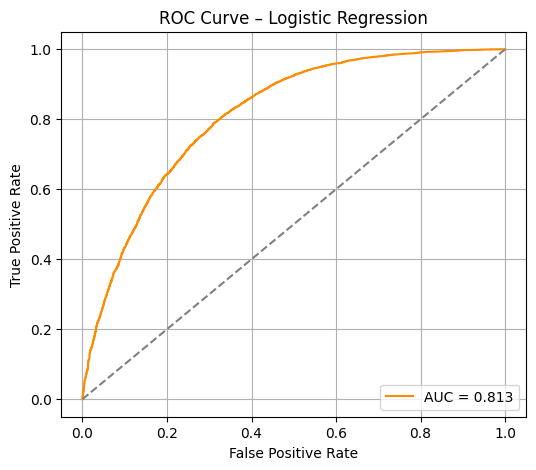

In [ ]:
# Predict probabilities (not class labels)
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 📈 ROC Curve and AUC Score

The ROC curve visualizes the model’s ability to separate diabetic from non-diabetic cases at various thresholds. The **AUC (Area Under Curve)** value quantifies this performance.

- **AUC Score**: 0.813  
- AUC values range from 0.5 (no skill) to 1.0 (perfect prediction)
- A score of **0.813** indicates that the model has **good discriminatory ability**

This plot supports the conclusion that logistic regression is an effective model for predicting diabetes risk using the selected health indicators.

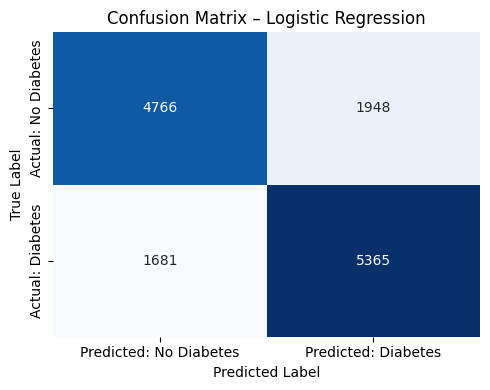

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No Diabetes', 'Predicted: Diabetes'],
            yticklabels=['Actual: No Diabetes', 'Actual: Diabetes'])

plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


### 🧮 Confusion Matrix (Visual)

The confusion matrix below provides a visual summary of how well the model predicted diabetes cases:

- **True Positives (bottom right)**: Individuals correctly identified as diabetic
- **True Negatives (top left)**: Individuals correctly identified as non-diabetic
- **False Positives (top right)**: Non-diabetics incorrectly flagged as diabetic
- **False Negatives (bottom left)**: Diabetics missed by the model

This plot highlights the model’s strengths and its few misclassifications, making it a useful diagnostic tool in model evaluation.
